# Setup

In [1]:
import numpy as np
import matplotlib.pylab as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.colorbar as colorbar

from scipy.stats import norm

from matplotlib import patheffects
#plt.rcParams['path.effects'] = [patheffects.withStroke(linewidth=4, foreground='b')]

from PIL import Image, ImageFilter

In [181]:
import Plotter

# Plotter

## Function

In [2]:
def Entropy(probabilities):
    if type(probabilities) is list:
        probabilities = np.array(probabilities)
    s = -probabilities*np.log(probabilities)
    s[np.isnan(s)] = 0
    return np.sum(s)

In [171]:
def PolarPlotmaker(probabilities, labels=None, figsize = (5,5), dpi = 120, background = None, debug = False, tick_color = 'chartreuse', linelength = 10, pad = 8, save_name = None, show = False, has_error = True, offwhite_cutoff=170, labelsize = 8):

    labels_type = 'string'
    
    if has_error:
        if probabilities[-1]==0:
            probabilities = probabilities[:-1]
            has_error = False
            
    n_qubits = len(probabilities)
    
    if has_error:
        n_qubits+=-1

    n_labels = n_qubits
    
    if has_error:
        n_labels+=1
    
    
    angles = np.linspace(0,2*np.pi-2*np.pi/(n_labels-1),n_labels)
    angles = np.concatenate((angles,[angles[0]]))
    probabilities = np.concatenate((probabilities,[probabilities[0]]))

    if debug:
        print(f'Angles (length {len(angles)}): {np.round(angles,4)}')
        print(f'Probabilities (length {len(probabilities)}): {np.round(probabilities,4)}')
        print(f'Has Errors: {has_error}')


    
    if labels is not None:
        if len(labels)>=n_qubits:
            labels = labels[:n_qubits]
        if len(labels)!=n_qubits:
            labels = np.arange(0,n_qubits)
            labels = labels.tolist()
            
            if has_error:
                labels += ["Can't Remember"]
            labels_type = 'int'
            labels_modified =  labels
        

    if labels is None:
        labels = np.arange(0,n_qubits)
        labels = labels.tolist()
        if has_error:
            labels += ["Can't Remember"]
        labels_type = 'int'
        labels_modified =  labels


    if labels_type == 'string':
        if has_error:
            labels += ["Can't Remember"]
        labels_modified = []
        for label in labels:
            new_label = ""
            lines = 1
            first_step = True
            for i, letter in enumerate(label):
                if lines == 3:
                    new_label = new_label[:-4]
                    new_label += '...'
                    break
                if i % linelength == 0 and not first_step:
                    lines+=1
                    if new_label[-1] != ' ':
                        new_label +='-'
                    new_label += '\n'
                new_label += letter
                first_step = False
            if new_label[:2] == "A " or new_label[:2] == "a ":
                new_label=new_label[2:]
            labels_modified.append(new_label)


    plt.xkcd(scale=2, length=0)
    plt.figure(figsize=figsize, dpi = dpi)
    
    ax = plt.subplot(111, polar=True)

    z = angles
    normalize = colors.Normalize(vmin=z.min(), vmax=z.max())

    cmap = colors.LinearSegmentedColormap.from_list("", ["aqua","mediumslateblue","orchid",'magenta', 'mediumorchid', 'mediumpurple','dodgerblue']*2)

    ax.plot(angles, probabilities, linewidth=1, linestyle='solid')
    
    # Fill area
    #ax.fill(angles, values, 'b', alpha=0.1)

    ax.set_yticklabels([])
    ax.get_yaxis().set_ticks([])

    for i in range(len(probabilities)-1):
        ax.fill_between([angles[i], angles[i+1]], [probabilities[i], probabilities[i+1]], color=cmap(normalize(z[i])))
    
    ax.set_xticks(angles[:-1])

    color_list = [tick_color]*(n_labels)
    if has_error:
        color_list[-1] = 'red'
    for xtick, color in zip(ax.get_xticklabels(), color_list):
        xtick.set_color(color)
    
    ax.set_xticklabels(labels_modified)
    
    #ax.set_xticklabels(labels_modified, color = tick_color)

    ax.xaxis.set_tick_params(grid_linewidth = 1, grid_color = tick_color, pad = pad, labelsize = 8)

    ax.set_axisbelow('True')
    
    ax.spines['polar'].set_color(tick_color)
    
    ax.set_ylim(0,max(probabilities))

    #ax.set_facecolor(background)


    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    # Show the graph

    error_entropy = 'None!'
    if has_error:
        probabilities_for_entropy = probabilities[:-2]
        error_prob = probabilities[-2]
        error_entropy = np.round(Entropy([error_prob]),2)
    if not has_error:
        probabilities_for_entropy = probabilities[:-1]
    plt.figtext(0.5,-0.1,f'Entropy of what you remember: {round(Entropy(probabilities_for_entropy),2)}\nResidual: {error_entropy}', color=tick_color, horizontalalignment='center')

    plt.tight_layout()
    
    if type(save_name)==str:
        plt.savefig(save_name+'.png', transparent = True,bbox_inches = "tight")
    
    if show:
        plt.show()

    if type(save_name)==str:
        img = Image.open(save_name+'.png')
        img = img.convert("RGBA")
    
        pixdata = img.load()

        width, height = img.size
        for y in range(height):
            for x in range(width):
                dat =  pixdata[x, y]
                if dat[-1]!=0:
                    dat = np.array(dat[:-1])
                    dat_tf = dat>offwhite_cutoff
                    if  dat_tf[0] and dat_tf[1] and dat_tf[2]:
                        pixdata[x, y] = (0,0,0,0)

        img.save(save_name+'.png', "PNG")

## Tests

In [178]:
n_qubits = 22
#angles = np.linspace(0,2*np.pi-2*np.pi/n_qubits,n_qubits+1)
values = np.random.random(n_qubits)
values[-1] = 0
values = values/np.sum(values)

labels =["A rooftop bar",
    "A comedy club",
    "A concert venue",
    "A music festival",
    "A street fair",
    "A bowling alley",
    "A casino",
    "A sports stadium",
    "A karaoke bar",
    "A restaurant with live music",
    "A rooftop terrace",
    "A beach bonfire",
    "A drive-in movie theater",
    "A laser tag arena",
    "A trampoline park",
    "An escape room",
    "A miniature golf course",
    "A rock climbing gym",
    "A go-kart track",
    "A bowling alley",
    "A comedy club",
    "A concert hall"]

print(f'Entropy of Values: {Entropy(values)}')
print(len(values))
print(len(labels))

Entropy of Values: 2.8651459254789082
22
22


/var/folders/l9/rj51m3r940n3xgsj0xb1sfl80000gn/T/ipykernel_26655/1360353597.py:4: RuntimeWarning: divide by zero encountered in log
  s = -probabilities*np.log(probabilities)
/var/folders/l9/rj51m3r940n3xgsj0xb1sfl80000gn/T/ipykernel_26655/1360353597.py:4: RuntimeWarning: invalid value encountered in multiply
  s = -probabilities*np.log(probabilities)


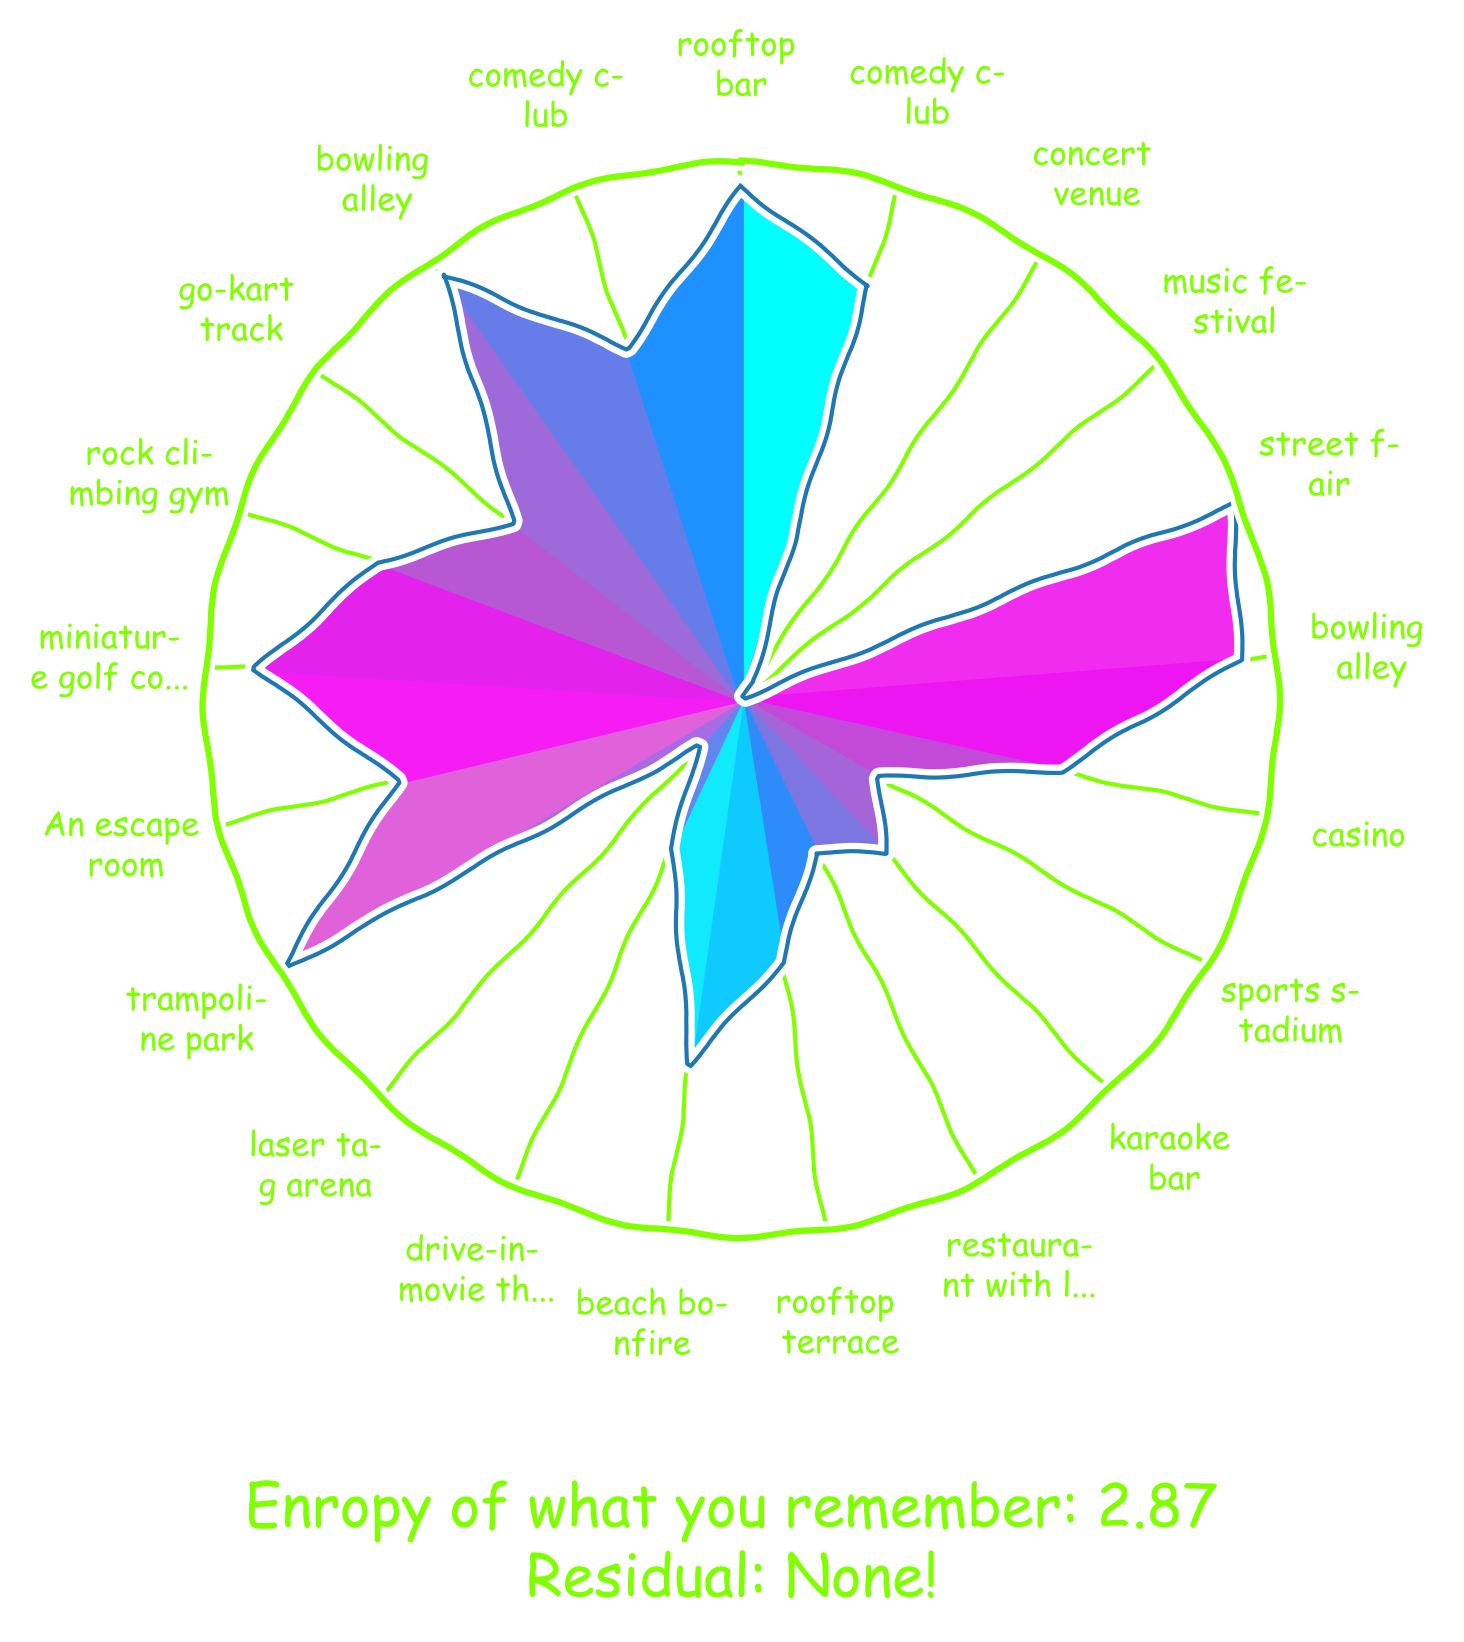

In [179]:
PolarPlotmaker(values, labels = labels, debug = False, background='black', tick_color='chartreuse', save_name='assets/tests/test', dpi = 300, show=True, has_error=True)

In [58]:
print(values)
print(values[:-2])


[0.03695878 0.08820986 0.04551727 0.04667139 0.01024442 0.04209356
 0.07293283 0.05988343 0.03068878 0.07618928 0.04315561 0.04591274
 0.02654314 0.07105558 0.05531621 0.03973416 0.02507974 0.0220774
 0.04424161 0.07258122 0.04307621 0.00183679]
[0.03695878 0.08820986 0.04551727 0.04667139 0.01024442 0.04209356
 0.07293283 0.05988343 0.03068878 0.07618928 0.04315561 0.04591274
 0.02654314 0.07105558 0.05531621 0.03973416 0.02507974 0.0220774
 0.04424161 0.07258122]


In [88]:
img = Image.open('test.png')
img = img.convert("RGBA")

pixdata = img.load()

width, height = img.size
for y in range(height):
    for x in range(width):
        dat =  pixdata[x, y]
        if dat[-1]!=0:
            dat = np.array(dat[:-1])
            dat_tf = dat>170
            if  dat_tf[0] and dat_tf[1] and dat_tf[2]:
                pixdata[x, y] = (0,0,0,0) #(255, 255, 255, 0)



img.save('test2.png', "PNG")

3*255*0.95

In [72]:
print(np.array(pixdata[1100,800][:-1])<225)



[False  True False]


In [73]:
0^1^0

1

In [83]:
1500*1500

2250000

In [182]:
len([
    "A rooftop bar",
    "A comedy club",
    "A concert venue",
    "A music festival",
    "A street fair",
    "A bowling alley",
    "A casino",
    "A sports stadium",
    "A karaoke bar",
    "A restaurant with live music",
    "A rooftop terrace",
    "A beach bonfire",
    "A drive-in movie theater",
    "A laser tag arena",
    "A trampoline park",
    "An escape room",
    "A miniature golf course",
    "A rock climbing gym",
    "A go-kart track",
    "A bowling alley",
    "A comedy club",
    "A concert hall",
    "A music festival",
    "A street festival",])

24

# Testing .py File

In [210]:
n_qubits = 22
#angles = np.linspace(0,2*np.pi-2*np.pi/n_qubits,n_qubits+1)
values = np.random.random(n_qubits)
#values[-1] = 0
values = values/np.sum(values)

labels =["A rooftop bar",
    "A comedy club",
    "A concert venue",
    "A music festival",
    "A street fair",
    "A bowling alley",
    "A casino",
    "A sports stadium",
    "A karaoke bar",
    "A restaurant with live music",
    "A rooftop terrace",
    "A beach bonfire",
    "A drive-in movie theater",
    "A laser tag arena",
    "A trampoline park",
    "An escape room",
    "A miniature golf course",
    "A rock climbing gym",
    "A go-kart track",
    "A bowling alley",
    "A comedy club",
    "A concert hall"]

print(f'Entropy of Values: {Entropy(values)}')
print(len(values))
print(len(labels))

Entropy of Values: 2.9070861182928343
22
22


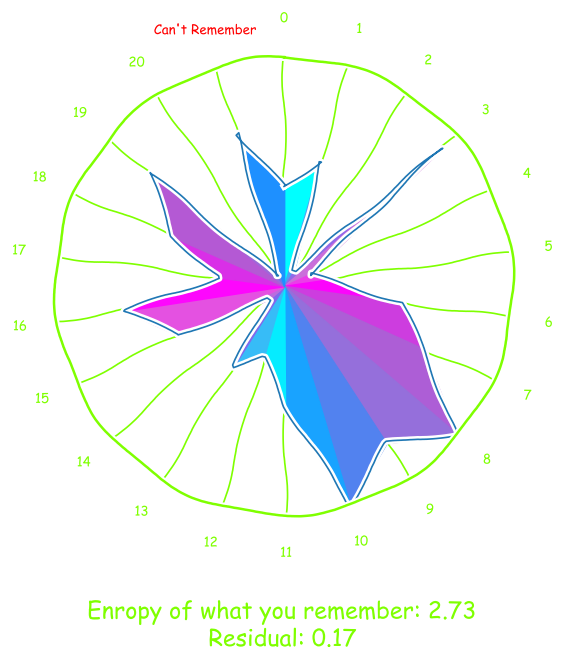

In [211]:
Plotter.PolarPlotmaker(values, save_name=None)